In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
pd.set_option("max_rows", 25)

In [3]:
# Apply the default theme
sns.set_theme()
sns.set_style("whitegrid")

In [4]:
data_path = '/home/achara/data/achara/'
df = pd.read_csv(data_path + 'final_vp_data_2017_to_2019.csv')

In [5]:
df.columns

Index(['DateTime', 'SensorDepth_Water_EXO', 'PC_Water_EXO', 'Chla_Water_EXO',
       'DO_Water_EXO', 'DO-Sat_Water_EXO', 'SpCond_Water_EXO',
       'Temperature_Water_EXO', 'pH_Water_EXO', 'rel_fl', 'month', 'day',
       'year', 'SolarRad_Air_LiCor', 'TP', 'TSP', 'SRP', 'TN', 'NO3', 'NH4',
       'PP'],
      dtype='object')

## Feature scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
ms = MinMaxScaler()

In [8]:
cols = ['SensorDepth_Water_EXO','PC_Water_EXO', 'Chla_Water_EXO',
       'DO_Water_EXO', 'DO-Sat_Water_EXO', 'SpCond_Water_EXO',
       'Temperature_Water_EXO', 'pH_Water_EXO', 'rel_fl', 'SolarRad_Air_LiCor', 'TP', 'TSP', 'SRP', 'TN', 'NO3', 'NH4',
       'PP']

In [9]:
X=df[cols]

Y=df[['PC_Water_EXO']]

In [10]:
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])

In [11]:
X.head()

,SensorDepth_Water_EXO,PC_Water_EXO,Chla_Water_EXO,DO_Water_EXO,DO-Sat_Water_EXO,SpCond_Water_EXO,Temperature_Water_EXO,pH_Water_EXO,rel_fl,SolarRad_Air_LiCor,TP,TSP,SRP,TN,NO3,NH4,PP
0,0.017306,0.165341,0.029115,0.606145,0.748075,0.113477,0.717584,0.803487,0.146619,0.389108,0.600322,1.0,1.0,0.648905,0.19007,1.665335e-16,0.478222
1,0.017695,0.162867,0.040962,0.607076,0.749657,0.113021,0.717880,0.812303,0.143080,0.389108,0.600322,1.0,1.0,0.648905,0.19007,1.665335e-16,0.478222
2,0.018084,0.148021,0.059983,0.605214,0.744468,0.110547,0.710480,0.808533,0.139541,0.389108,0.600322,1.0,1.0,0.648905,0.19007,1.665335e-16,0.478222
3,0.018473,0.167816,0.066091,0.605214,0.747885,0.112891,0.718917,0.818426,0.136002,0.389108,0.600322,1.0,1.0,0.648905,0.19007,1.665335e-16,0.478222
4,0.018862,0.150495,0.057054,0.604283,0.746936,0.112305,0.719361,0.810754,0.137772,0.389108,0.600322,1.0,1.0,0.648905,0.19007,1.665335e-16,0.478222


## K-means

In [12]:
from sklearn.cluster import KMeans

In [13]:
def cluster(n:int):
       kmeans = KMeans(n_clusters=n, random_state=0)
       kmeans.fit(X)
       y_kmeans = kmeans.predict(X)
       inertia = kmeans.inertia_
       return y_kmeans, inertia

In [14]:
sse = []
for k in range(2,10):
       y_kmeans, inertia = cluster(k)
       sse.append(inertia)

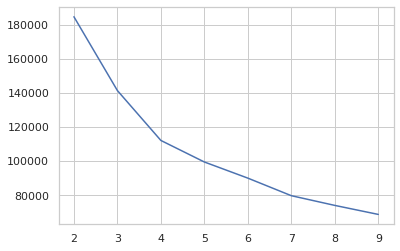

In [15]:
sns.lineplot(x=range(2,10), y=sse)
#plt.plot(range(2,20), sse, scalex=20)
plt.show()

### Conclusion:

The optimal number of clusters is 4

In [16]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [26]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=cols)

In [27]:
centers

,SensorDepth_Water_EXO,PC_Water_EXO,Chla_Water_EXO,DO_Water_EXO,DO-Sat_Water_EXO,SpCond_Water_EXO,Temperature_Water_EXO,pH_Water_EXO,rel_fl,SolarRad_Air_LiCor,TP,TSP,SRP,TN,NO3,NH4,PP
0,0.138084,0.208040,0.123200,0.682950,0.804006,0.198901,0.655377,0.695183,0.214238,0.818085,0.173125,0.536830,0.774439,0.666335,0.568957,0.059684,0.102935
1,0.445231,0.341620,0.111187,0.802232,0.731376,0.158716,0.256477,0.537776,0.394848,0.905527,1.000000,0.521351,0.309222,0.819458,0.071383,1.000000,1.000000
2,0.416814,0.260621,0.118286,0.644785,0.595138,0.151632,0.267598,0.518126,0.279761,0.230030,0.217131,0.239643,0.271104,0.491878,0.330294,0.160259,0.206137
3,0.562140,0.303799,0.124434,0.730019,0.636859,0.140965,0.171271,0.395564,0.326388,0.833713,0.156722,0.525697,0.762646,0.657980,0.577728,0.058075,0.087281


In [28]:
centers.columns

Index(['SensorDepth_Water_EXO', 'PC_Water_EXO', 'Chla_Water_EXO',
       'DO_Water_EXO', 'DO-Sat_Water_EXO', 'SpCond_Water_EXO',
       'Temperature_Water_EXO', 'pH_Water_EXO', 'rel_fl', 'SolarRad_Air_LiCor',
       'TP', 'TSP', 'SRP', 'TN', 'NO3', 'NH4', 'PP'],
      dtype='object')

In [30]:
cols

['SensorDepth_Water_EXO',
 'PC_Water_EXO',
 'Chla_Water_EXO',
 'DO_Water_EXO',
 'DO-Sat_Water_EXO',
 'SpCond_Water_EXO',
 'Temperature_Water_EXO',
 'pH_Water_EXO',
 'rel_fl',
 'SolarRad_Air_LiCor',
 'TP',
 'TSP',
 'SRP',
 'TN',
 'NO3',
 'NH4',
 'PP']

In [31]:
x=['SensorDepth_Water_EXO',
 'Chla_Water_EXO',
 'DO_Water_EXO',
 'DO-Sat_Water_EXO',
 'SpCond_Water_EXO',
 'Temperature_Water_EXO',
 'pH_Water_EXO',
 'rel_fl',
 'SolarRad_Air_LiCor',
 'TP',
 'TSP',
 'SRP',
 'TN',
 'NO3',
 'NH4',
 'PP']
y='PC_Water_EXO'

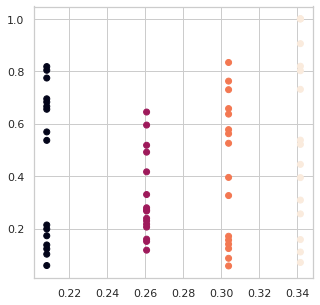

In [51]:
plt.figure(figsize=(5, 5))
for col in x:
       plt.scatter(y=centers[col], x=centers['PC_Water_EXO'], c=centers[y])
       # sns.scatterplot(x=col, y='PC_Water_EXO', hue='PC_Water_EXO', palette='bright',size=col, data=centers)
plt.show()